In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn import datasets, preprocessing
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

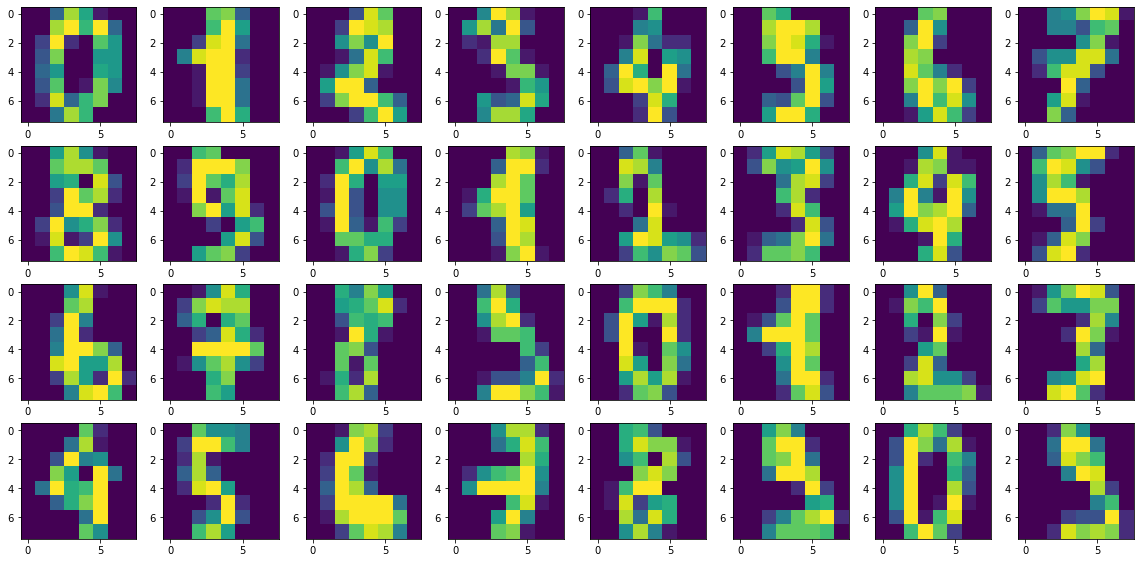

In [3]:
data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(32):
    plt.subplot(8, 8, i + 1)
    plt.imshow(data.images[i])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size = 0.36, random_state = 74)

gnb = GaussianNB()

gnb.fit(X_train, Y_train)

Y_predicted = gnb.predict(X_test)

print(f"Accuracy is {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy is 0.848531684698609


In [7]:
data.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

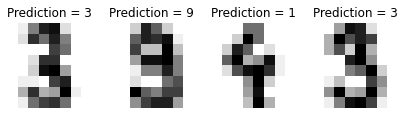

In [8]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (7, 5))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title(f'Prediction = {prediction}')


In [9]:
print(f"Report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.67      0.94      0.78        79
           2       0.93      0.49      0.64        55
           3       0.98      0.90      0.94        67
           4       0.96      0.84      0.90        63
           5       0.92      0.93      0.93        60
           6       0.97      0.95      0.96        61
           7       0.74      0.96      0.84        69
           8       0.64      0.67      0.66        64
           9       0.98      0.76      0.86        63

    accuracy                           0.85       647
   macro avg       0.88      0.84      0.85       647
weighted avg       0.87      0.85      0.85       647




Confusion matrix:
[[64  0  0  0  0  1  0  1  0  0]
 [ 0 74  0  0  0  0  0  1  3  1]
 [ 0 14 27  0  0  0  0  0 14  0]
 [ 0  0  0 60  0  1  0  3  3  0]
 [ 0  2  0  0 53  0  1  6  1  0]
 [ 0  0  0  0  0 56  0  3  1  0]
 [ 0  0  1  0  1  1 58  0  0  0]
 [ 0  0  1  0  1  1  0 66  0  0]
 [ 0 17  0  0  0  1  0  3 43  0]
 [ 1  4  0  1  0  0  1  6  2 48]]


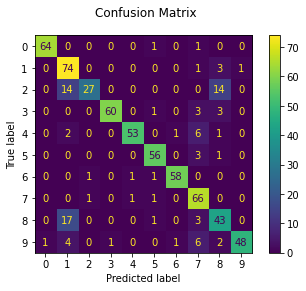

In [10]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()